In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [48]:
data=pd.read_csv("/home/rrvc/machine_learining_practice/trainingdata.csv")

In [49]:
data.head()

fd_transac_route  fd_term_finan_inst  fd_transac_type  fd_transac_amt  \
0                 1                   9                2           13905   
1                 4                   1                1           17000   
2                 4                   9                2           13747   
3                 4                   9                1           28000   
4                 5                   1                4            5474   

   fd_IC_transac  fd_fraud_Y  fd_transac_ref_analysis_id  fd_transac_hour  \
0              1           0                       39857                0   
1              1           0                       39858                0   
2              1           0                       39859                0   
3              1           0                       39860                0   
4              1           0                       39861                0   

   fd_transac_weekday  fd_days_since_last_transac  fd_account_age  \
0                   3                    2.483762     2992.962384   
1                   3                    1.572037      962.996701   
2                   3                    6.201991     3550.000000   
3                   3                    0.192095     1851.019109   
4                   3                    1.483067     2657.954688   

   fd_cust_age  fd_transac_amt_perc_by_avg  fd_transac_critical  \
0    37.948004                    0.966283                    0   
1    85.980881                    1.157706                    0   
2    24.937045                    1.049945                    0   
3    64.964443                    1.163205                    1   
4    45.953484                    0.580493                    0   

   fd_transac_24hr_same_acc_same_type  fd_transac_24hr_same_acc_type_1  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   1                                1   
4                                   0                                0   

   fd_transac_24hr_same_acc_type_2  fd_transac_24hr_same_acc_type_3  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   fd_transac_24hr_same_acc_type_4  fd_transac_24hr_same_acc_type_7  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   fd_transac_24hr_same_acc_type_11  fd_transac_24hr_same_acc_type_12  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   fd_transac_24hr_same_acc_type_15  fd_transac_3month_same_acc_same_type  \
0                                 0                                     7   
1                                 0                                     9   
2                                 0                                     9   
3                                 0                                     7   
4                                 0                                     9   

   fd_transac_3month_same_acc_type_1  fd_transac_3month_same_acc

In [50]:
data.info() #summary of how data structured in csv 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26264 entries, 0 to 26263
Data columns (total 51 columns):
fd_transac_route                             26264 non-null int64
fd_term_finan_inst                           26264 non-null int64
fd_transac_type                              26264 non-null int64
fd_transac_amt                               26264 non-null int64
fd_IC_transac                                26264 non-null int64
fd_fraud_Y                                   26264 non-null int64
fd_transac_ref_analysis_id                   26264 non-null int64
fd_transac_hour                              26264 non-null int64
fd_transac_weekday                           26264 non-null int64
fd_days_since_last_transac                   26264 non-null float64
fd_account_age                               26264 non-null float64
fd_cust_age                                  26264 non-null float64
fd_transac_amt_perc_by_avg                   26264 non-null float64
fd_transac_critical      

In [51]:
data.describe() # give all the possible mean, std, min etc

fd_transac_route  fd_term_finan_inst  fd_transac_type  fd_transac_amt  \
count      26264.000000        26264.000000     26264.000000    26264.000000   
mean           2.083232            7.650320         2.479097    36678.389963   
std            1.522528            2.996022         2.358242    29238.435203   
min            1.000000            1.000000         1.000000        0.000000   
25%            1.000000            9.000000         1.000000    15000.000000   
50%            1.000000            9.000000         2.000000    29000.000000   
75%            4.000000            9.000000         3.000000    47000.000000   
max            5.000000            9.000000        15.000000    98000.000000   

       fd_IC_transac    fd_fraud_Y  fd_transac_ref_analysis_id  \
count   26264.000000  26264.000000                26264.000000   
mean        0.923926      0.041007                52988.500000   
std         0.265121      0.198309                 7581.908071   
min         0.000000      0.000000                39857.000000   
25%         1.000000      0.000000                46422.750000   
50%         1.000000      0.000000                52988.500000   
75%         1.000000      0.000000                59554.250000   
max         1.000000      1.000000                66120.000000   

       fd_transac_hour  fd_transac_weekday  fd_days_since_last_transac  \
count     26264.000000        26264.000000                26264.000000   
mean         14.112664            3.992728                    4.558693   
std           4.327666            1.983037                    4.691349   
min           0.000000            1.000000                    0.000000   
25%          12.000000            2.000000                    1.047315   
50%          15.000000            4.000000                    2.999306   
75%          18.000000            6.000000                    6.626502   
max          23.000000            7.000000                   20.000000   

       fd_account_age   fd_cust_age  fd_transac_amt_perc_by_avg  \
count    26264.000000  26264.000000                26264.000000   
mean      1776.834130     56.909979                    0.909373   
std       1151.482145     24.399922                    0.372358   
min          0.016296      2.000000                    0.000000   
25%        725.569887     35.057112                    0.813757   
50%       1917.626105     55.204468                    0.984155   
75%       2824.916198     78.180342                    1.123548   
max       3550.000000     99.239841                    2.000000   

       fd_transac_critical  fd_transac_24hr_same_acc_same_type  \
count         26264.000000                        26264.000000   
mean              0.082813                            0.174079   
std               0.275743                            0.718501   
min               0.000000                            0.000000   
25%               0.000000                            0.000000   
50%               0.000000                            0.000000   
75%               0.000000                            0.000000   
max               2.000000                           14.000000   

       fd_transac_24hr_same_acc_type_1  fd_transac_24hr_same_acc_type_2  \
count                     26264.000000                     26264.000000   
mean                          0.060349                         0.025853   
std                           0.336360                         0.174689   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           6.000000                         4.000000   

       fd_transac_24hr_same_acc_type_3  fd_transac_24hr_same_acc_type_4  \
count                     26264.000000                     26264.000000   

In [52]:
color_list = ["red" if i==1 else "green" for i in data.loc[:, "fd_fraud_Y"]]
print "red" in color_list


True


pd.plotting.scatter_matrix(data.loc[:, data.columns != "fd_fraud_Y"], 
                          c=color_list, 
                          figsize=[15,15],
                          diagonal="hist",
                          alpha=0.5,
                          s=200,
                          marker=".", # representaion of dots 
                          edgecolor="black")
plt.show()

In [53]:
# to know if either of 1 or 0 is available in 10% or not
sns.countplot(x="fd_fraud_Y", data=data)
data.loc[:, "fd_fraud_Y"].value_counts()

# 1 is only 4% of total data, is this data is sufficent ??

0    25187
1     1077
Name: fd_fraud_Y, dtype: int64

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3) # initialize the model 
x, y = data.loc[:, data.columns != "fd_fraud_Y"], data.loc[:, "fd_fraud_Y"]
knn.fit(x, y) # training the model 
prediction = knn.predict(x) # predictin on the same dataset on which the model was made 
print "Prediction: ",  prediction

Prediction:  [0 0 0 ..., 0 0 0]


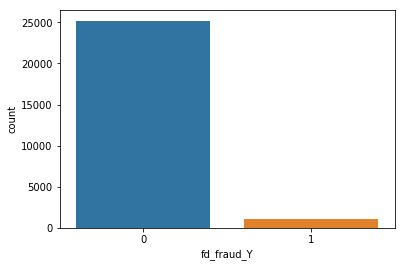

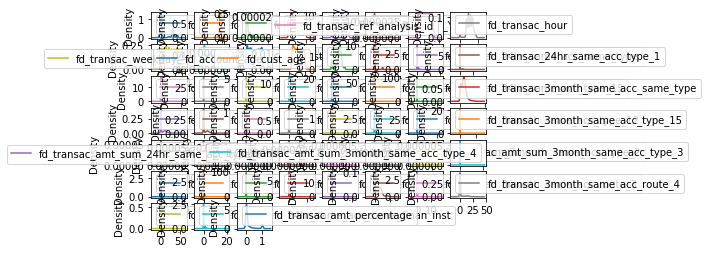

In [55]:
data.plot(kind='density', subplots=True, layout=(7,8), sharex=False )
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
x, y = data.loc[:, data.columns != "fd_fraud_Y"], data.loc[:, "fd_fraud_Y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # randome_state as seed so 
                                                                                         # that next time we get 
                                                                                        # same random combination 
knn = KNeighborsClassifier(n_neighbors =13)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("with LNN (K=13) accuracy is:", knn.score(x_test, y_test) ) 

('with LNN (K=13) accuracy is:', 0.96852791878172584)


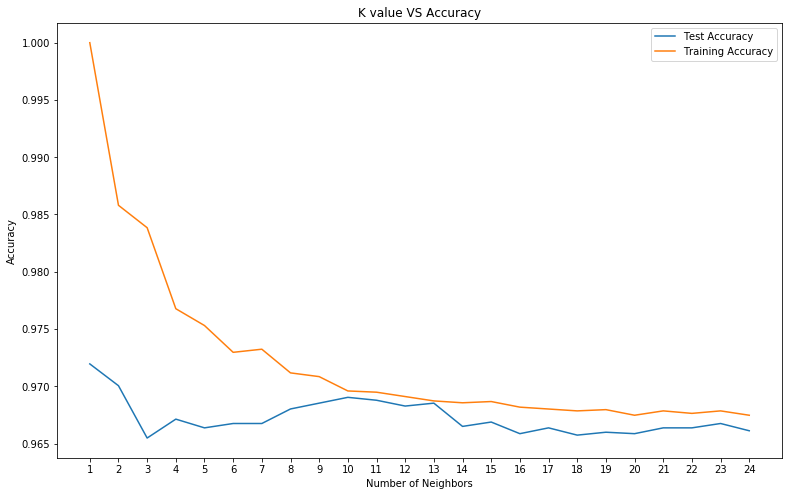

Best accuracy is 0.971954314721 with k=1


In [31]:
# model complexity 
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# loop over diffrent values of k

for i, k in enumerate(neig):
    # k from 1 to 25 (exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # train_accuracy 
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy 
    test_accuracy.append(knn.score(x_test,y_test))
    
#plot
plt.figure(figsize=[13, 8])
plt.plot(neig, test_accuracy, label="Test Accuracy")
plt.plot(neig, train_accuracy, label="Training Accuracy")
plt.legend()
plt.title("K value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with k={}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
x, y = data.loc[:, data.columns != "fd_fraud_Y"], data.loc[:, data.columns == "fd_fraud_Y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

rf = RandomForestClassifier()
print "till here"
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print "Confusion matrix:\n ", cm 
print "Classification report:\n", classification_report(y_test, y_pred)

till here


/home/rrvc/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Confusion matrix:
  [[7535   11]
 [  59  275]]
Classification report:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      7546
          1       0.96      0.82      0.89       334

avg / total       0.99      0.99      0.99      7880



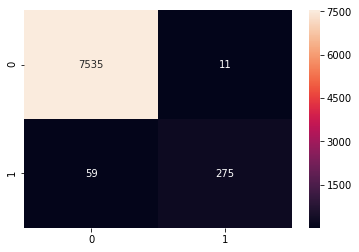

In [60]:
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

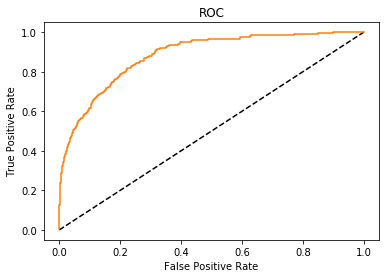

In [66]:
# ROc curve 
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report
# abnormal =1  and normal - 0 
x, y = data.loc[:, (data.columns != 'class')], data.loc[:, data.columns=="fd_fraud_Y"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_prob = logreg.predict_proba(x_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
# Plot ROC curve 
plt.plot(0, 1, [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

In [ ]:
# grid search cross validation with i hyper parameter 
from sklearn.model_selection import GridSearchCV
grid = {"n_neighbors": np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCv
knn_cv.fit(x, y) # fit

/home/rrvc/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
# print hyperparameter 
print("Tuned hyperparameterk: {}".format(knn_cv.best_params_))
print("Best score: {}".format(knn_cv.best_score_))